In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [117]:
# File paths
shapefile_path = '../data/precinct_results/2020/sd_2020.shp'
csv_2024_path = '../data/precinct_results/2024-elections-official/individual_states/sd24_cleaned.csv'


## Read 2020 Data

In [118]:
# Ensure the CRS is in EPSG:4326 for consistency
gdf_2020 = gpd.read_file(shapefile_path) #.to_crs("EPSG:4326")

In [119]:
gdf_2020.head()

,STATEFP,COUNTYFP,VTDST,NAME,G20PRERTRU,G20PREDBID,G20PRELJOR,G20USSRROU,G20USSDAHL,G20HALRJOH,G20HALDLUA,G20PUCRHAN,G20PUCDEAG,G20PUCLSAX,geometry
0,46,103,VTD3-4,Precinct RC 3-4,1738,1298,88,1917,1201,2305,615,1829,949,185,"MULTIPOLYGON (((-103.25963 44.08216, -103.2589..."
1,46,103,VTD1-3,Precinct RC 1-3,1716,1003,78,1866,919,2203,462,1807,700,146,"POLYGON ((-103.21182 44.04503, -103.21182 44.0..."
2,46,103,VTD1-2,Precinct RC 1-2,1275,795,89,1380,758,1577,444,1261,608,159,"POLYGON ((-103.19167 44.06656, -103.19165 44.0..."
3,46,103,VTD2-4,Precinct RC 2-4,1236,1131,129,1371,1093,1578,722,1132,964,229,"POLYGON ((-103.22663 44.07542, -103.22496 44.0..."
4,46,103,VTD2-1,Precinct RC 2-1,60,66,8,72,61,76,48,60,55,11,"POLYGON ((-103.22926 44.09009, -103.2277 44.08..."


In [120]:
# gdf_2020.PCT_CEB.dtype
gdf_2020.VTDST.dtype

dtype('O')

In [121]:
gdf_2020.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G20PRERTRU', 'G20PREDBID',
       'G20PRELJOR', 'G20USSRROU', 'G20USSDAHL', 'G20HALRJOH', 'G20HALDLUA',
       'G20PUCRHAN', 'G20PUCDEAG', 'G20PUCLSAX', 'geometry'],
      dtype='object')

In [122]:
# gdf_2020['precinct'] = gdf_2020['PRECINCT']
# gdf_2020['precinct'] = pd.to_numeric(gdf_2020['PCT_CEB'], errors='coerce')
# gdf_2020['precinct'] = pd.to_numeric(gdf_2020['VTDST'], errors='coerce')
gdf_2020['precinct'] = gdf_2020['VTDST'].apply(str)

In [123]:
gdf_2020.precinct.dtype

dtype('O')

In [124]:
# Check necessary columns
if 'G20PREDBID' not in gdf_2020.columns or 'G20PRERTRU' not in gdf_2020.columns or 'precinct' not in gdf_2020.columns:
    raise ValueError("2020 shapefile must have 'G20PREDBID', 'G20PRERTRU', and 'precinct' columns.")


In [125]:
# Calculate 2020 democratic voteshare
gdf_2020['dem_voteshare_2020'] = gdf_2020['G20PREDBID'] / (gdf_2020['G20PREDBID'] + gdf_2020['G20PRERTRU'] + gdf_2020['G20PRELJOR'])


## Read 2024 Data

In [126]:
df_2024 = pd.read_csv(csv_2024_path)

In [127]:
df_2024.columns

Index(['precinct', 'office', 'party_detailed', 'party_simplified', 'mode',
       'votes', 'county_name', 'county_fips', 'jurisdiction_name',
       'jurisdiction_fips', 'candidate', 'district', 'dataverse', 'year',
       'stage', 'state', 'special', 'writein', 'state_po', 'state_fips',
       'state_cen', 'state_ic', 'date', 'magnitude'],
      dtype='object')

In [128]:
df_2024.head()

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,...,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,magnitude
0,Precinct-1,CONSTITUTIONAL AMENDMENT F: AN AMENDMENT TO TH...,NaN,NaN,TOTAL,147,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
1,Precinct-2,CONSTITUTIONAL AMENDMENT F: AN AMENDMENT TO TH...,NaN,NaN,TOTAL,63,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
2,Precinct-3,CONSTITUTIONAL AMENDMENT F: AN AMENDMENT TO TH...,NaN,NaN,TOTAL,193,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
3,Precinct-5,CONSTITUTIONAL AMENDMENT F: AN AMENDMENT TO TH...,NaN,NaN,TOTAL,121,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
4,Precinct-7,CONSTITUTIONAL AMENDMENT F: AN AMENDMENT TO TH...,NaN,NaN,TOTAL,174,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0


In [129]:
# Filter for General Election, US President votes
df_2024_filtered = df_2024[
    (df_2024['year'] == 2024) &
    (df_2024['stage'] == 'GEN') &
    (df_2024['office'] == 'US PRESIDENT')
]

In [130]:
df_2024_filtered.shape

(2764, 24)

In [131]:
df_2024_filtered.head()

,precinct,office,party_detailed,party_simplified,mode,votes,county_name,county_fips,jurisdiction_name,jurisdiction_fips,...,stage,state,special,writein,state_po,state_fips,state_cen,state_ic,date,magnitude
18424,Precinct-1,US PRESIDENT,DEMOCRAT,DEMOCRAT,TOTAL,56,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
18425,Precinct-2,US PRESIDENT,DEMOCRAT,DEMOCRAT,TOTAL,21,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
18426,Precinct-3,US PRESIDENT,DEMOCRAT,DEMOCRAT,TOTAL,103,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
18427,Precinct-5,US PRESIDENT,DEMOCRAT,DEMOCRAT,TOTAL,47,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0
18428,Precinct-7,US PRESIDENT,DEMOCRAT,DEMOCRAT,TOTAL,75,AURORA,46003,AURORA,46003,...,GEN,SOUTH DAKOTA,False,False,SD,46,45,37,2024-11-05,1.0


In [132]:
# Aggregate votes across voting modes (IN-PERSON, ABSENTEE, etc.) by precinct and party
df_2024_agg = (
    df_2024_filtered
    .groupby(['precinct', 'party_simplified'], as_index=False)
    .agg({'votes': 'sum'})
    .pivot(index='precinct', columns='party_simplified', values='votes')
    .reset_index()
    .fillna(0)  # Fill missing values with 0 for precincts with no votes for a party
)

In [133]:
df_2024_agg['precinct'] = df_2024_agg['precinct'].apply(str)

In [134]:
df_2024_agg.shape

(429, 5)

In [135]:
df_2024_agg.head()

party_simplified,precinct,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN
0,02-21,125,5,3,387
1,06,129,2,7,366
2,08,60,1,3,182
3,1. Faith Lutheran Church,696,18,45,1366
4,11-14,153,2,3,305


In [136]:
# Calculate total votes and democratic voteshare for 2024
df_2024_agg['total_votes_2024'] = df_2024_agg['DEMOCRAT'] + df_2024_agg['REPUBLICAN'] + df_2024_agg['LIBERTARIAN'] + df_2024_agg['OTHER']
df_2024_agg['dem_voteshare_2024'] = df_2024_agg['DEMOCRAT'] / df_2024_agg['total_votes_2024']

In [137]:
df_2024_agg.head(15)

party_simplified,precinct,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN,total_votes_2024,dem_voteshare_2024
0,02-21,125,5,3,387,520,0.240385
1,06,129,2,7,366,504,0.255952
2,08,60,1,3,182,246,0.243902
3,1. Faith Lutheran Church,696,18,45,1366,2125,0.327529
4,11-14,153,2,3,305,463,0.330454
5,12,105,4,11,365,485,0.216495
6,13-14,113,6,12,404,535,0.211215
7,15,393,4,21,864,1282,0.306552
8,16,314,7,12,825,1158,0.271157
9,2. New Life Assembly of God Church,658,16,50,1589,2313,0.284479


In [138]:
df_2024_agg[['precinct']]

party_simplified,precinct
0,02-21
1,06
2,08
3,1. Faith Lutheran Church
4,11-14
...,...
424,White McKnight Hall
425,Witten Consolidated
426,Wound Knee District School Gym
427,Yankton City Hall


In [139]:
df_2024_agg.precinct.dtype

dtype('O')

## Merge 2020 and 2024

In [140]:
# Ensure matching on the precinct column
merged = gdf_2020.merge(df_2024_agg, on = 'precinct', how = 'left')

In [141]:
merged.shape

(737, 23)

In [146]:
merged.head()

,STATEFP,COUNTYFP,VTDST,NAME,G20PRERTRU,G20PREDBID,G20PRELJOR,G20USSRROU,G20USSDAHL,G20HALRJOH,...,geometry,precinct,dem_voteshare_2020,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN,total_votes_2024,dem_voteshare_2024,delta_dem_vote
0,46,103,VTD3-4,Precinct RC 3-4,1738,1298,88,1917,1201,2305,...,"MULTIPOLYGON (((-103.25963 44.08216, -103.2589...",VTD3-4,0.415493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46,103,VTD1-3,Precinct RC 1-3,1716,1003,78,1866,919,2203,...,"POLYGON ((-103.21182 44.04503, -103.21182 44.0...",VTD1-3,0.358598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,103,VTD1-2,Precinct RC 1-2,1275,795,89,1380,758,1577,...,"POLYGON ((-103.19167 44.06656, -103.19165 44.0...",VTD1-2,0.368226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46,103,VTD2-4,Precinct RC 2-4,1236,1131,129,1371,1093,1578,...,"POLYGON ((-103.22663 44.07542, -103.22496 44.0...",VTD2-4,0.453125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46,103,VTD2-1,Precinct RC 2-1,60,66,8,72,61,76,...,"POLYGON ((-103.22926 44.09009, -103.2277 44.08...",VTD2-1,0.492537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Change in Democratic Voteshare

In [142]:
merged['delta_dem_vote'] = merged['dem_voteshare_2024'] - merged['dem_voteshare_2020']

## Plot Results

In [143]:
def plot_delta_dem_vote(gdf, state_abbr):
    """
    Plot precincts colored by the change in democratic voteshare.
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf.plot(column='delta_dem_vote', cmap='RdBu', legend=True, ax=ax,
             legend_kwds={'label': "Change in Democratic Voteshare (2024 - 2020)", 'orientation': 'horizontal'})
    ax.set_title(f"Change in Democratic Voteshare - {state_abbr.upper()}, 2024 vs 2020", fontsize=16)
    ax.axis('off')
    plt.show()

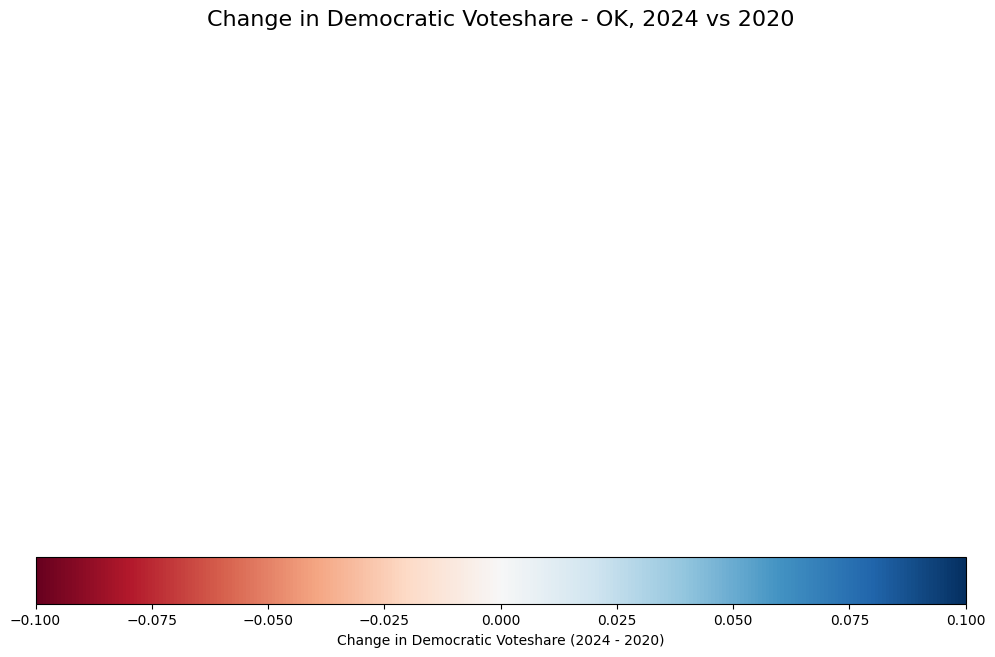

In [145]:
# Plot the result for Delaware
plot_delta_dem_vote(merged, 'ok')